In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

### おまじない

In [2]:
sns.set(font='Yu Gothic')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

## 5.2 数値例で理解する最小二乗法

### 表5.3

In [3]:
df = pd.DataFrame({
    'y1': [40, 20, 50, 10],
    'x1': [5, 1, 3, 2]
})
df

,y1,x1
0,40,5
1,20,1
2,50,3
3,10,2


### 図5.4

<AxesSubplot:xlabel='x1', ylabel='y1'>

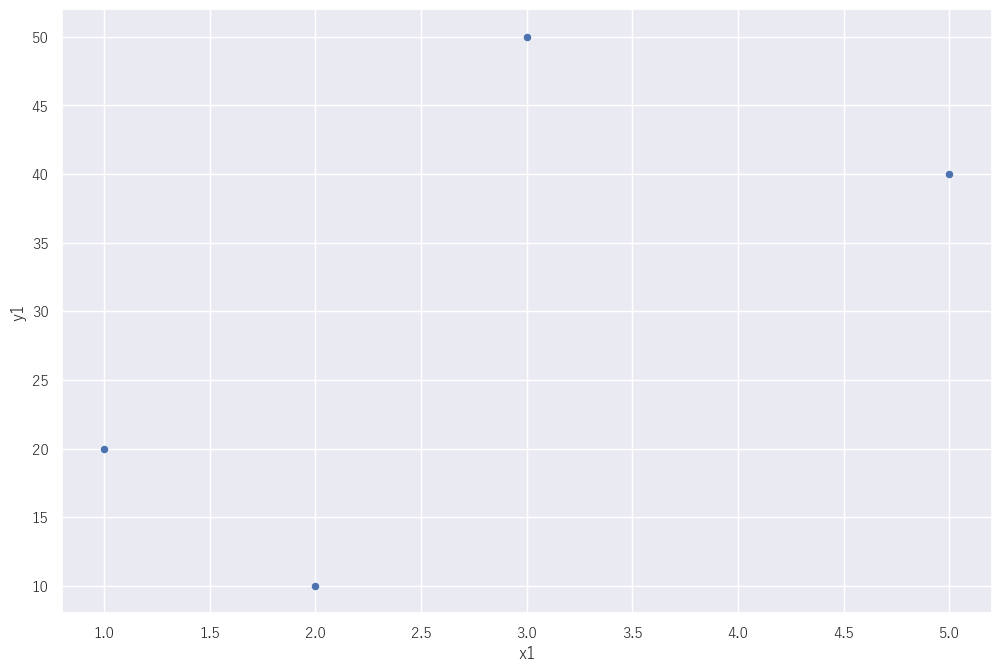

In [4]:
sns.scatterplot(data=df, x='x1', y='y1')

### 表5.4

In [5]:
df['yhat1'] = 11.143 + 6.857 * df['x1']
df['e1'] = df['y1'] - df['yhat1']
display(df[['yhat1', 'e1']])

,yhat1,e1
0,45.428,-5.428
1,18.000,2.000
2,31.714,18.286
3,24.857,-14.857


#### 表5.5

In [6]:
df['yhat2'] = 10.909 * df['x1']
df['e2'] = df['y1'] - df['yhat2']
display(df[['yhat2', 'e2']])

,yhat2,e2
0,54.545,-14.545
1,10.909,9.091
2,32.727,17.273
3,21.818,-11.818


### 表5.6

In [7]:
df[['e1', 'e2']].sum()

e1    0.001
e2    0.001
dtype: float64

### 表5.7

In [8]:
df['e1b'] = df['e1'] ** 2
df['e2b'] = df['e2'] ** 2
df[['e1b', 'e2b']].sum()

e1b    588.571429
e2b    732.224959
dtype: float64

## 5.3 種明かし：最小二乗法による切片と傾きの公式

### 表5.8

In [9]:
xbar = df['x1'].mean()
ybar = df['y1'].mean()

In [10]:
xbar

2.75

In [11]:
ybar

30.0

### 表5.9

In [12]:
df['hensax'] = df['x1'] - xbar
df['hensay'] = df['y1'] - ybar
df[['hensax', 'hensay']]

,hensax,hensay
0,2.25,10.0
1,-1.75,-10.0
2,0.25,20.0
3,-0.75,-20.0


### 表5.10

In [13]:
df['hensaxy'] = df['hensax'] * df['hensay']
num = df['hensaxy'].sum()
num

60.0

### 表5.11

In [14]:
df['hensax2'] = df['hensax'] **2
denom = df['hensax2'].sum()
denom

8.75

### 表5.12

In [15]:
b1 = num/denom
b0 = ybar - b1 * xbar

In [16]:
b1

6.857142857142857

In [17]:
b0

11.142857142857142

### 表5.13

In [18]:
model = smf.ols(formula='y1 ~ x1 ', data=df)
res = model.fit(cov_type='nonrobust')
res.summary()

c:\users\00991442\appdata\local\programs\python\python38\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     1.398
Date:                Thu, 14 Jul 2022   Prob (F-statistic):              0.359
Time:                        19:25:14   Log-Likelihood:                -15.659
No. Observations:                   4   AIC:                             35.32
Df Residuals:                       2   BIC:                             34.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1429     18.109      0.615      0.601     -66.772      89.058
x1             6.8571      5.799      1.182      0.359     -18.096      31.810
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.411
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.309
Skew:                           0.376   Prob(JB):                        0.857
Kurtosis:                       1.864   Cond. No.                         7.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
b1b = ybar/xbar
b1b

10.909090909090908

## 5.4 数値例で理解する最小二乗法

In [20]:
df2 = pd.DataFrame({
    'y1': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'x1': [1, 1, 1, 2, 2, 2, 3, 3, 3],
})
df2

,y1,x1
0,1,1
1,2,1
2,3,1
3,4,2
4,5,2
5,6,2
6,7,3
7,8,3
8,9,3


In [21]:
df2['y1'].mean()

5.0

In [22]:
model2 = smf.ols(formula='y1 ~ x1 ', data=df2)
res2 = model2.fit()
res2.summary()

c:\users\00991442\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     63.00
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           9.58e-05
Time:                        19:25:14   Log-Likelihood:                -10.946
No. Observations:                   9   AIC:                             25.89
Df Residuals:                       7   BIC:                             26.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0000      0.816     -1.225      0.260      -2.931       0.931
x1             3.0000      0.378      7.937      0.000       2.106       3.894
==============================================================================
Omnibus:                        2.380   Durbin-Watson:                   2.333
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                0.844
Skew:                           0.000   Prob(JB):                        0.656
Kurtosis:                       1.500   Cond. No.                         6.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
print(-1 + 3 * 1)
print(-1 + 3 * 2)
print(-1 + 3 * 3)

2
5
8


### 表5.17

#### A.散布図

<AxesSubplot:xlabel='x1', ylabel='y1'>

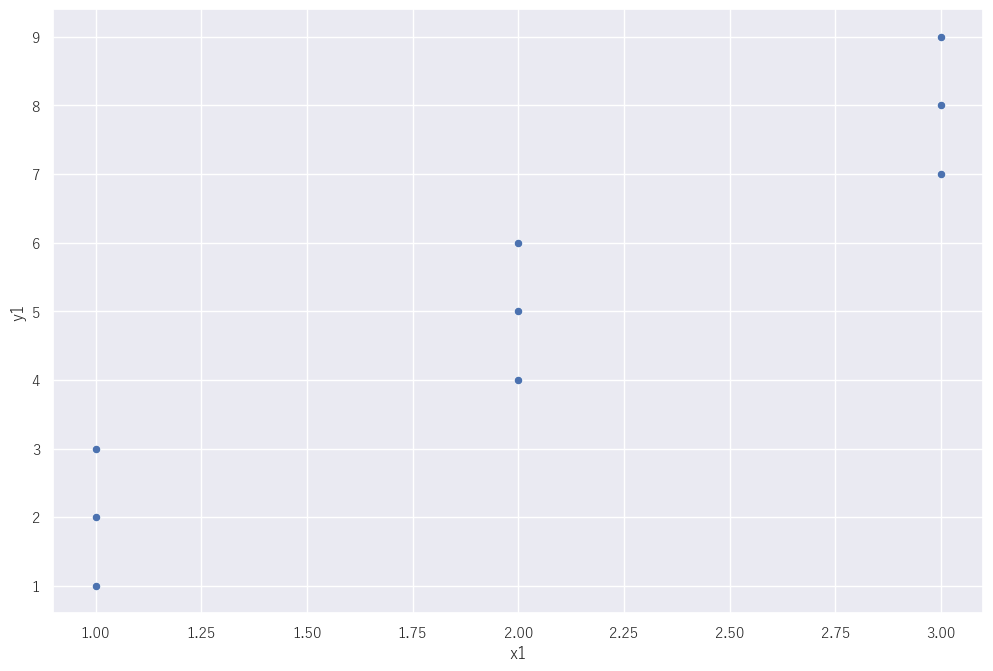

In [24]:
sns.scatterplot(data=df2, x='x1', y='y1')

#### E[Y|X]

<AxesSubplot:xlabel='x1', ylabel='y1'>

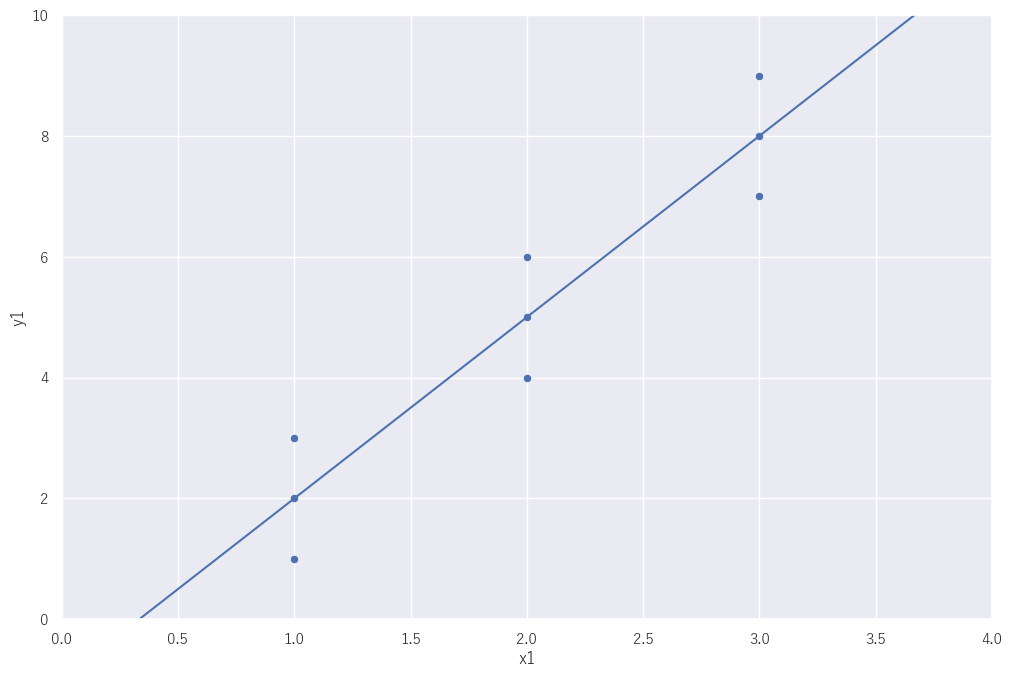

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
# add the plots for each dataframe
_ = ax.set(xlim=[0,4], ylim=[0,10])
## 当てはめ値を計算
xticks = np.arange(0,4,0.1)
yhat = xticks*res2.params['x1']+res2.params['Intercept']

sns.scatterplot(data=df2, x='x1', y='y1', ax=ax)
sns.lineplot(x=xticks, y=yhat, ax=ax)

###  表5.18

In [26]:
print((1 + 2 + 3)/3)
print((4 + 5 + 6)/3)
print((7 + 8 + 9)/3)

2.0
5.0
8.0


## 5.5 最小二乗法による切片と傾きの公式（補遺）

### 表5.19

In [27]:
df3 = pd.DataFrame({
    'x1': [5, 1, 3, 2],
    'y1': [40, 20, 50, 10],
})
model3 = smf.ols('y1 ~ x1', data=df3)
res3 = model3.fit(cov_type='nonrobust')
res3.summary()

c:\users\00991442\appdata\local\programs\python\python38\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     1.398
Date:                Thu, 14 Jul 2022   Prob (F-statistic):              0.359
Time:                        19:25:14   Log-Likelihood:                -15.659
No. Observations:                   4   AIC:                             35.32
Df Residuals:                       2   BIC:                             34.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1429     18.109      0.615      0.601     -66.772      89.058
x1             6.8571      5.799      1.182      0.359     -18.096      31.810
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.411
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.309
Skew:                           0.376   Prob(JB):                        0.857
Kurtosis:                       1.864   Cond. No.                         7.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
bOLS = res.params['x1']
ussOLS = np.sum(res3.resid ** 2)
print(ussOLS)

588.5714285714287


### 表5.20

In [29]:
b1 = np.ndarray(10000, dtype=np.float64)
uss = np.ndarray(10000, dtype=np.float64)
b1.fill(np.nan)
uss.fill(np.nan)

np.random.seed(1)
for i in range(0, 10000):
    a1 = 11.14286
    b1[i] = np.random.uniform(-10, 25)
    yhat = a1 + b1[i] * df3['x1']
    uss[i] = ((df3['y1'] - yhat)**2).sum()

### 表5.21

In [30]:
display(pd.Series(uss).describe())
print(ussOLS)

count    10000.000000
mean      4555.575421
std       3574.446377
min        588.571431
25%       1312.217039
50%       3541.491602
75%       7271.503434
max      13419.788411
dtype: float64

588.5714285714287


### 表5.22

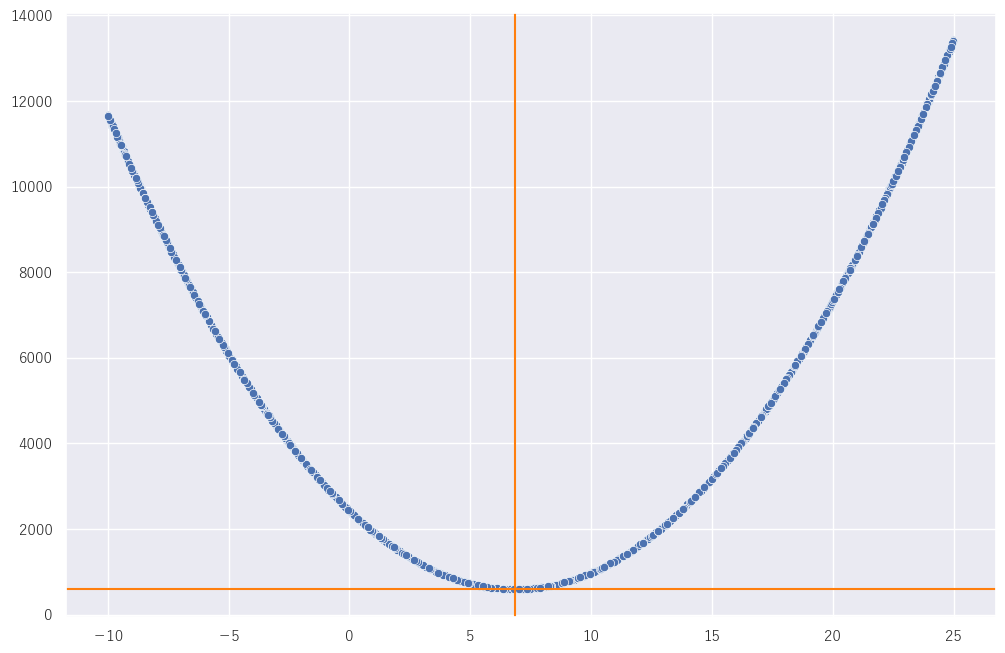

In [31]:
ax = sns.scatterplot(x=b1, y=uss)
ax.axvline(bOLS, color='tab:orange')
ax.axhline(ussOLS, color='tab:orange')